# ADS-DV Week 2 Assignment 5

# Recreating a multiple line graph

## Summary
This assignment lets you dive deep into paying attention to details in a plot by recreating someone else's data visualization.

## Recreating a plot
You are going to recreate the first plot in the following article about tall Dutch people:

http://www.randalolson.com/2014/06/23/why-the-dutch-are-so-tall/

To help you on your way, we download the dataset first and clean it by interpolating missing data, see also http://pandas.pydata.org/pandas-docs/stable/missing_data.html.

The color series used in the plot is taken from the default Tableau color scheme. In the following blogpost you can read how you can use it in your plots: http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/. It also helps you with adding the Country annotations.

Try to reproduce the plot as closely as possible. Good luck!!

Do you agree with the conclusions from the article?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

heights = pd.read_csv('http://files.figshare.com/1545826/world_heights.csv')
heights_cleaned = heights.interpolate()

In [3]:
heights_cleaned.tail()

,Year,The Netherlands,Italy,France,Sweden,U.S.A.,Germany,Denmark
161,1979,181.733333,175.181395,174.936744,177.629032,178.85,180.170000,181.4
162,1980,182.000000,175.386047,175.102558,177.696774,179.00,180.170000,181.4
163,1997,184.000000,175.590698,175.268372,177.764516,178.10,180.446667,181.8
164,2009,183.750000,175.795349,175.434186,177.832258,177.20,180.723333,182.2
165,2013,183.800000,176.000000,175.600000,177.900000,176.30,181.000000,182.6


In [4]:
heights_cleaned.head()

,Year,The Netherlands,Italy,France,Sweden,U.S.A.,Germany,Denmark
0,1818,163.79,NaN,NaN,NaN,NaN,NaN,NaN
1,1819,164.46,NaN,NaN,NaN,NaN,NaN,NaN
2,1820,164.72,NaN,NaN,NaN,173.00,NaN,NaN
3,1821,164.71,NaN,NaN,NaN,173.05,NaN,NaN
4,1822,164.81,NaN,NaN,NaN,173.10,NaN,NaN


(1817, 2014)

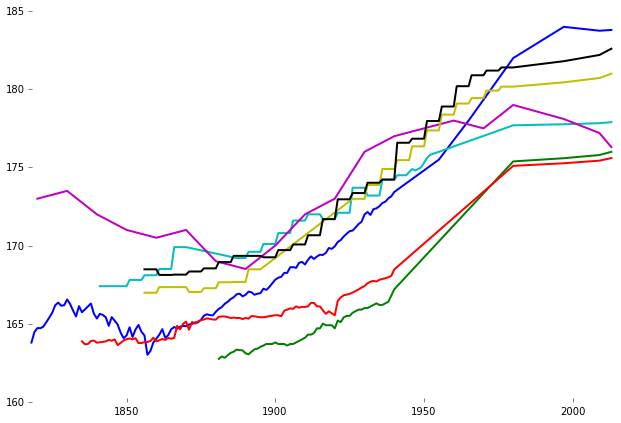

In [5]:
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)  


fig = plt.figure(figsize=(10.5,7))
ax=fig.add_subplot(1,1,1)

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  


countries = heights_cleaned.ix[:,'The Netherlands':]
ax.plot(heights_cleaned['Year'], countries, lw=2)
plt.ylim(160, 185)    
plt.xlim(1817, 2014)


# plt.text(1995, 93, "Median male height (cm) in various countries", fontsize=17, ha="center")    